In [1]:
import rioxarray


In [2]:
import os

data_folder = 'data'
output_folder = 'output'

if not os.path.exists(data_folder):
    os.mkdir(data_folder)
if not os.path.exists(output_folder):
    os.mkdir(output_folder)

In [3]:
import requests

def download(url):
    filename = os.path.join(data_folder, os.path.basename(url))
    if not os.path.exists(filename):
      with requests.get(url, stream=True, allow_redirects=True) as r:
          with open(filename, 'wb') as f:
              for chunk in r.iter_content(chunk_size=8192):
                  f.write(chunk)
      print('Downloaded', filename)

In [4]:
download('https://naciscdn.org/naturalearth/10m/cultural/' +
         'ne_10m_populated_places_simple.zip')


In [5]:
import requests
import zipfile
import io
import os
import geopandas as gpd

# Define datasets with name and URL
datasets = {
    "hydrography": "https://prd-tnm.s3.amazonaws.com/StagedProducts/Hydrography/NHD/HU4/Shape/NHD_H_1809_HU4_Shape.zip",
    "structures": "https://prd-tnm.s3.amazonaws.com/StagedProducts/Structures/Shape/Structures_National_Shapes_SHP.zip",
    "transportation": "https://prd-tnm.s3.amazonaws.com/StagedProducts/Transportation/Shape/Transportation_National_Shapes_SHP.zip",
    "boundaries": "https://prd-tnm.s3.amazonaws.com/StagedProducts/Boundaries/Shape/Boundaries_National_Shapes_SHP.zip"
}

# Create output directory
base_dir = "usgs_vector_datasets"
os.makedirs(base_dir, exist_ok=True)

# Download and extract each dataset
for name, url in datasets.items():
    print(f"\n⬇ Downloading {name} from:\n{url}")
    response = requests.get(url)
    if response.status_code == 200:
        dataset_dir = os.path.join(base_dir, name)
        os.makedirs(dataset_dir, exist_ok=True)
        with zipfile.ZipFile(io.BytesIO(response.content)) as z:
            z.extractall(dataset_dir)
        print(f"✅ Extracted {name} to {dataset_dir}")
    else:
        print(f"❌ Failed to download {name} (HTTP {response.status_code})")

# Optionally load one into GeoPandas to verify
sample_path = os.path.join(base_dir, "hydrography", "NHDFlowline.shp")
if os.path.exists(sample_path):
    gdf = gpd.read_file(sample_path)
    print("\n🗺 Sample Hydrography Data:")
    print(gdf.head())
else:
    print("\n⚠ Could not find hydrography shapefile to load.")



⬇ Downloading hydrography from:
https://prd-tnm.s3.amazonaws.com/StagedProducts/Hydrography/NHD/HU4/Shape/NHD_H_1809_HU4_Shape.zip
✅ Extracted hydrography to usgs_vector_datasets\hydrography

⬇ Downloading structures from:
https://prd-tnm.s3.amazonaws.com/StagedProducts/Structures/Shape/Structures_National_Shapes_SHP.zip
❌ Failed to download structures (HTTP 404)

⬇ Downloading transportation from:
https://prd-tnm.s3.amazonaws.com/StagedProducts/Transportation/Shape/Transportation_National_Shapes_SHP.zip
❌ Failed to download transportation (HTTP 404)

⬇ Downloading boundaries from:
https://prd-tnm.s3.amazonaws.com/StagedProducts/Boundaries/Shape/Boundaries_National_Shapes_SHP.zip
❌ Failed to download boundaries (HTTP 404)

⚠ Could not find hydrography shapefile to load.


In [6]:
import requests
import os

def download_file(url, save_path, chunk_size=1024):
    """
    Download a file from a URL and save it to a local path.

    Parameters:
        url (str): The URL of the file to download.
        save_path (str): Full path (including filename) to save the file.
        chunk_size (int): Bytes to read per iteration (default 1024).
    """
    try:
        response = requests.get(url, stream=True)
        response.raise_for_status()  # Raise error for bad status codes

        os.makedirs(os.path.dirname(save_path), exist_ok=True)

        with open(save_path, "wb") as f:
            for chunk in response.iter_content(chunk_size=chunk_size):
                if chunk:  # Filter out keep-alive chunks
                    f.write(chunk)

        print(f"✅ Download complete: {save_path}")

    except requests.exceptions.RequestException as e:
        print(f"❌ Download failed: {e}")
save_path = "data/usgs_data_dwnld.zip"

# url='https://www.naturalearthdata.com/downloads/10m-cultural-vectors/10m-admin-0-countries/'
url='https://naciscdn.org/naturalearth/10m/cultural/ne_10m_populated_places.zip'
# https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/10m/cultural/ne_10m_admin_0_countries.zip
download_file(url,save_path)


✅ Download complete: data/usgs_data_dwnld.zip


In [7]:
import requests

def download(url):
    filename = os.path.join(data_folder, os.path.basename(url))
    if not os.path.exists(filename):
      with requests.get(url, stream=True, allow_redirects=True) as r:
          with open(filename, 'wb') as f:
              for chunk in r.iter_content(chunk_size=8192):
                  f.write(chunk)
      print('Downloaded', filename)

    

In [8]:
# %%capture

In [9]:
import requests, zipfile, io, os

# url ='https://naciscdn.org/naturalearth/10m/cultural/ne_10m_populated_places.zip'
url='https://naciscdn.org/naturalearth/10m/cultural/' +'ne_10m_populated_places_simple.zip'
save_dir = "natural_earth/population"

os.makedirs(save_dir, exist_ok=True)
response = requests.get(url)
with zipfile.ZipFile(io.BytesIO(response.content)) as z:
    z.extractall(save_dir)

print("✅ Population data downloaded and extracted.")


✅ Population data downloaded and extracted.


In [10]:
file = 'ne_10m_populated_places_simple.shp'
filepath = os.path.join(save_dir, file)
print(filepath)
places = gpd.read_file(filepath)
places

natural_earth/population\ne_10m_populated_places_simple.shp


,scalerank,natscale,labelrank,featurecla,name,namepar,namealt,nameascii,adm0cap,capalt,...,pop_max,pop_min,pop_other,rank_max,rank_min,meganame,ls_name,min_zoom,ne_id,geometry
0,10,1,8.0,Admin-1 capital,Colonia del Sacramento,None,None,Colonia del Sacramento,0,0,...,21714,21714,0.0,7,7,None,None,9.0,1159112629,POINT (-57.83612 -34.46979)
1,10,1,8.0,Admin-1 capital,Trinidad,None,None,Trinidad,0,0,...,21093,21093,0.0,7,7,None,None,9.0,1159112647,POINT (-56.901 -33.544)
2,10,1,8.0,Admin-1 capital,Fray Bentos,None,None,Fray Bentos,0,0,...,23279,23279,0.0,7,7,None,None,9.0,1159112663,POINT (-58.304 -33.139)
3,10,1,8.0,Admin-1 capital,Canelones,None,None,Canelones,0,0,...,19698,19698,0.0,6,6,None,None,9.0,1159112679,POINT (-56.284 -34.538)
4,10,1,8.0,Admin-1 capital,Florida,None,None,Florida,0,0,...,32234,32234,0.0,7,7,None,None,7.0,1159112703,POINT (-56.215 -34.099)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7337,0,600,1.0,Admin-1 capital,Rio de Janeiro,None,None,Rio de Janeiro,0,0,...,11748000,2010175,1821489.0,14,12,Rio de Janeiro,Rio de Janeiro,1.7,1159151619,POINT (-43.21212 -22.90731)
7338,0,600,1.0,Admin-1 capital,São Paulo,None,Sao Paulo|Sio Paulo,Sao Paulo,0,0,...,18845000,10021295,11522944.0,14,14,S,Sao Paolo,3.0,1159151621,POINT (-46.62697 -23.55673)
7339,0,600,3.0,Admin-1 capital,Sydney,None,None,Sydney,0,0,...,4630000,3641422,2669348.0,12,12,Sydney,Sydney1,1.7,1159151623,POINT (151.21255 -33.87137)
7340,0,600,0.0,Admin-0 capital,Singapore,None,None,Singapore,1,0,...,5183700,3289529,3314179.0,13,12,Singapore,Singapore,2.1,1159151627,POINT (103.85387 1.29498)


In [11]:
capitals = places[places['adm0cap'] == 1]
capitals

,scalerank,natscale,labelrank,featurecla,name,namepar,namealt,nameascii,adm0cap,capalt,...,pop_max,pop_min,pop_other,rank_max,rank_min,meganame,ls_name,min_zoom,ne_id,geometry
880,8,10,3.0,Admin-0 capital,Vatican City,None,None,Vatican City,1,0,...,832,832,562430.0,2,2,None,Vatican City,7.0,1159127243,POINT (12.45339 41.90328)
4828,7,20,0.0,Admin-0 capital,San Marino,None,None,San Marino,1,0,...,29579,29000,0.0,7,7,None,San Marino,6.1,1159146051,POINT (12.44177 43.9361)
4833,7,20,0.0,Admin-0 capital,Vaduz,None,None,Vaduz,1,0,...,36281,5342,33009.0,7,5,None,Vaduz,6.7,1159146061,POINT (9.51667 47.13372)
5012,6,30,8.0,Admin-0 capital,Luxembourg,None,None,Luxembourg,1,0,...,107260,76684,106219.0,9,8,None,Luxembourg,6.0,1159146437,POINT (6.13 49.61166)
6178,6,30,0.0,Admin-0 capital,Palikir,None,None,Palikir,1,0,...,4645,4645,0.0,4,4,None,Palikir,6.0,1159149061,POINT (158.14997 6.91664)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7330,0,600,3.0,Admin-0 capital,Cairo,None,Al-Qahirah,Cairo,1,0,...,11893000,7734614,13720557.0,14,13,Al-Qahirah,Cairo,1.7,1159151603,POINT (31.24802 30.05191)
7332,0,600,2.0,Admin-0 capital,Tokyo,None,None,Tokyo,1,0,...,35676000,8336599,12945252.0,14,13,Tokyo,Tokyo,1.7,1159151609,POINT (139.74946 35.68696)
7334,0,600,3.0,Admin-0 capital,Paris,None,None,Paris,1,0,...,9904000,11177,7142744.0,13,6,Paris,Paris,1.7,1159151613,POINT (2.35299 48.85809)
7335,0,600,3.0,Admin-0 capital,Santiago,None,None,Santiago,1,0,...,5720000,46611,3066651.0,13,7,Santiago,Santiago3,2.0,1159151615,POINT (-70.6505 -33.44021)


In [12]:
output_file = 'capitals.gpkg'
output_path = os.path.join(output_folder, output_file)
print(output_path)
capitals.to_file(driver='GPKG', filename=output_path)

output\capitals.gpkg


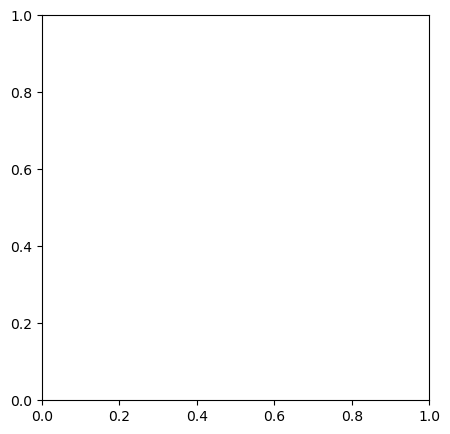

In [55]:
import os
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

fig.set_size_inches(5,5)
plt.show()


In [14]:
point = (0.5, 1)

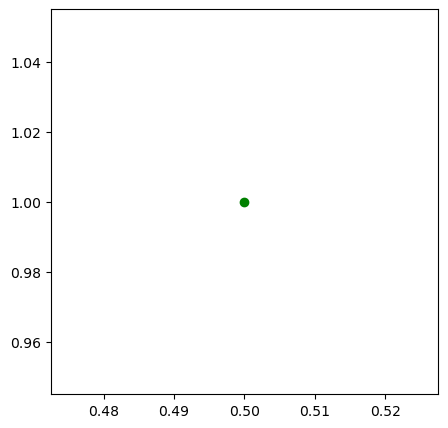

In [59]:
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(5,5)
ax.plot(point[0], point[1], color='green', marker='o')
# ax2.plot(point[0], point[1], color='red', marker='o')
plt.show()

In [16]:
points = [(0.1, 0.5), (0.5, 0.5), (0.9, 0.5)]

In [17]:
x, y = zip(*points)
print(x)
print(y)

(0.1, 0.5, 0.9)
(0.5, 0.5, 0.5)


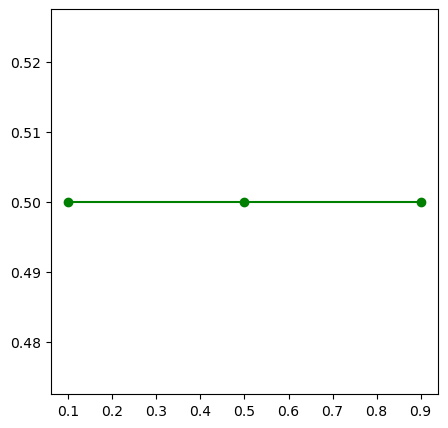

In [18]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(5,5)
ax.plot(x, y, color='green', marker='o')
plt.show()

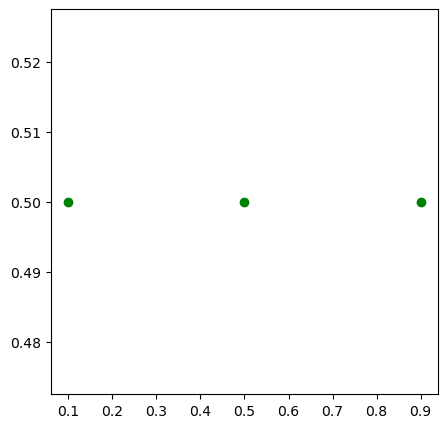

In [19]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(5,5)
ax.plot(x, y, color='green', marker='o', linestyle='None')
plt.show()

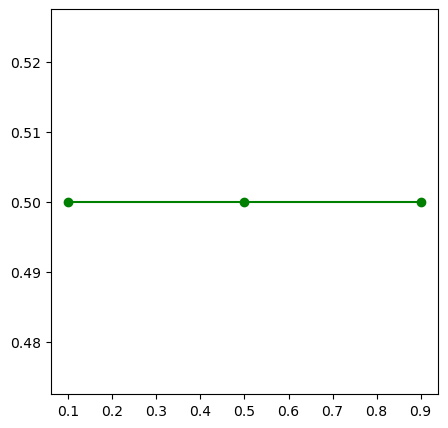

In [20]:

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(5,5)
ax.plot(x, y, color='green', marker='o')

output_folder = 'output'
output_path = os.path.join(output_folder, 'simple.png')
plt.savefig(output_path)

plt.show()

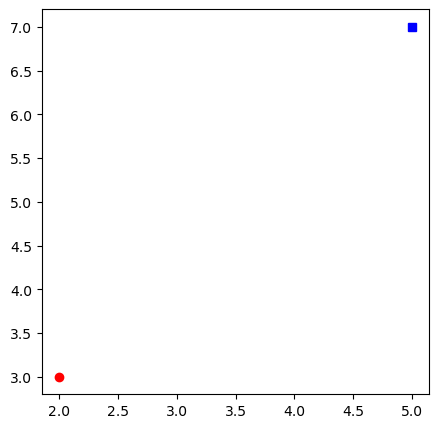

In [21]:
# Define two points
point1 = (2, 3)
point2 = (5, 7)

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(5,5)
# Plot point1 with a red circle


ax.plot(point1[0], point1[1], color='red', marker='o' )
ax.plot(point2[0], point2[1], 'bs', linestyle='None')


plt.show()


In [22]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import requests

In [23]:
data_folder = 'data'
output_folder = 'output'

if not os.path.exists(data_folder):
    os.mkdir(data_folder)
if not os.path.exists(output_folder):
    os.mkdir(output_folder)

In [24]:
def download(url):
    filename = os.path.join(data_folder, os.path.basename(url))
    if not os.path.exists(filename):
      with requests.get(url, stream=True, allow_redirects=True) as r:
          with open(filename, 'wb') as f:
              for chunk in r.iter_content(chunk_size=8192):
                  f.write(chunk)
      print('Downloaded', filename)

In [25]:
# https://github.com/spatialthoughts/python-dataviz-web/releases/download/police.uk/2020-01-metropolitan-street.csv

In [26]:
files = [
  '2020-01-metropolitan-street.csv',
  '2020-02-metropolitan-street.csv',
  '2020-03-metropolitan-street.csv',
  '2020-04-metropolitan-street.csv',
  '2020-05-metropolitan-street.csv',
  '2020-06-metropolitan-street.csv',
  '2020-07-metropolitan-street.csv',
  '2020-08-metropolitan-street.csv',
  '2020-09-metropolitan-street.csv',
  '2020-10-metropolitan-street.csv',
  '2020-11-metropolitan-street.csv',
  '2020-12-metropolitan-street.csv'
]


data_url = 'https://github.com/spatialthoughts/python-dataviz-web/releases/' \
  'download/police.uk/'

for f in files:
  url = os.path.join(data_url + f)
  download(url)

In [27]:
dataframe_list = []

for f in files:
    filepath = os.path.join(data_folder, f)
    df = pd.read_csv(filepath)
    dataframe_list.append(df)
    # print(filepath)
merged_df = pd.concat(dataframe_list)

In [28]:
merged_df

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,24c2b43c34c7cd6ef847d69fbb042c9c730b1eebe95c52...,2020-01,Metropolitan Police Service,Metropolitan Police Service,-0.539301,50.817200,On or near Highdown Drive,E01031469,Arun 009F,Other theft,Status update unavailable,NaN
1,NaN,2020-01,Metropolitan Police Service,Metropolitan Police Service,0.134947,51.588063,On or near Mead Grove,E01000027,Barking and Dagenham 001A,Anti-social behaviour,NaN,NaN
2,NaN,2020-01,Metropolitan Police Service,Metropolitan Police Service,0.140035,51.589112,On or near Beansland Grove,E01000027,Barking and Dagenham 001A,Anti-social behaviour,NaN,NaN
3,NaN,2020-01,Metropolitan Police Service,Metropolitan Police Service,0.137065,51.583672,On or near Police Station,E01000027,Barking and Dagenham 001A,Anti-social behaviour,NaN,NaN
4,NaN,2020-01,Metropolitan Police Service,Metropolitan Police Service,0.137065,51.583672,On or near Police Station,E01000027,Barking and Dagenham 001A,Anti-social behaviour,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
87931,05780af1c8515c41499ef396a33fc4e5c248533cecd9c4...,2020-12,Metropolitan Police Service,Metropolitan Police Service,NaN,NaN,No Location,NaN,NaN,Violence and sexual offences,Investigation complete; no suspect identified,NaN
87932,54ce60d717f01752c5ff44f870e07a503e3fbeaae0b91e...,2020-12,Metropolitan Police Service,Metropolitan Police Service,NaN,NaN,No Location,NaN,NaN,Other crime,Investigation complete; no suspect identified,NaN
87933,580fdc2edfe26a09392ab6b9128732ba0c7cd05695387a...,2020-12,Metropolitan Police Service,Metropolitan Police Service,NaN,NaN,No Location,NaN,NaN,Other crime,Offender given a caution,NaN
87934,2730906a962972bed3589463c9be9dbb8ee8e594b779a3...,2020-12,Metropolitan Police Service,Metropolitan Police Service,NaN,NaN,No Location,NaN,NaN,Other crime,Investigation complete; no suspect identified,NaN


In [29]:
type_counts = merged_df.groupby('Last outcome category', dropna=False)['Crime type'].size()
type_counts # series
df = type_counts.to_frame()
print(df)


# print(type(type_counts))
# df.groupby('Department', dropna=False)['Salary']  #no null value

                                               Crime type
Last outcome category                                    
Awaiting court outcome                               2161
Court result unavailable                            41770
Formal action is not in the public interest             3
Investigation complete; no suspect identified      571354
Local resolution                                    30198
Offender given a caution                             6230
Offender given a drugs possession warning             333
Offender given penalty notice                        7041
Status update unavailable                          107708
Suspect charged as part of another case                19
NaN                                                415105


In [30]:
import pandas as pd
import numpy as np

data = {
    'Department': ['HR', 'IT', 'HR', np.nan, 'Finance', np.nan],
    'Salary': [50000, 60000, 52000, 61000, 58000, 55000]
}

df = pd.DataFrame(data)

# Group by Department, include NaN groups
grouped = df.groupby('Department', dropna=False)['Salary'].mean()
print(grouped)


Department
Finance    58000.0
HR         51000.0
IT         60000.0
NaN        58000.0
Name: Salary, dtype: float64


In [31]:
type_counts1 = merged_df.groupby('Crime type').size()
type_counts1

Crime type
Anti-social behaviour           415105
Bicycle theft                    23517
Burglary                         61044
Criminal damage and arson        50923
Drugs                            51629
Other crime                      10066
Other theft                      81924
Possession of weapons             5763
Public order                     53458
Robbery                          27269
Shoplifting                      34588
Theft from the person            31084
Vehicle crime                   108344
Violence and sexual offences    227208
dtype: int64

In [32]:
# Convert to DataFrame
grouped_df = type_counts1.reset_index()
# print(grouped_df)
label=grouped_df['Crime type'].tolist()
label
# Get list of column names
column_names = grouped_df.columns.tolist()

grouped_df.rename(columns={0: 'Number'}, inplace=True)
column_names = grouped_df.columns.tolist()
print(column_names)
values=grouped_df['Number'].tolist()
values



['Crime type', 'Number']


[415105,
 23517,
 61044,
 50923,
 51629,
 10066,
 81924,
 5763,
 53458,
 27269,
 34588,
 31084,
 108344,
 227208]

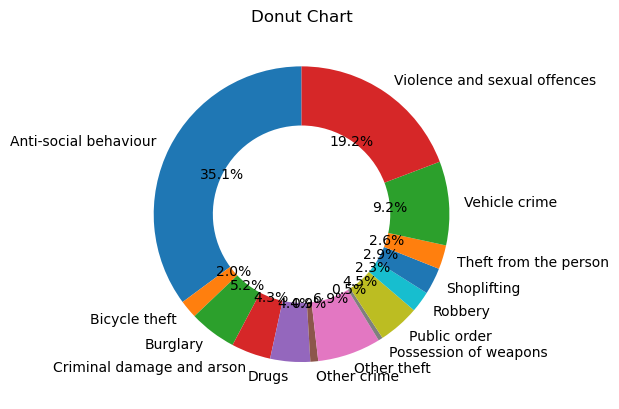

In [33]:
import matplotlib.pyplot as plt

# sizes = [30, 40, 30]
# labels = ['A', 'B', 'C']

fig, ax = plt.subplots()
ax.pie(values, labels=label, autopct='%1.1f%%', startangle=90, wedgeprops={'width': 0.4})
ax.set(aspect="equal")
plt.title("Donut Chart")
plt.show()


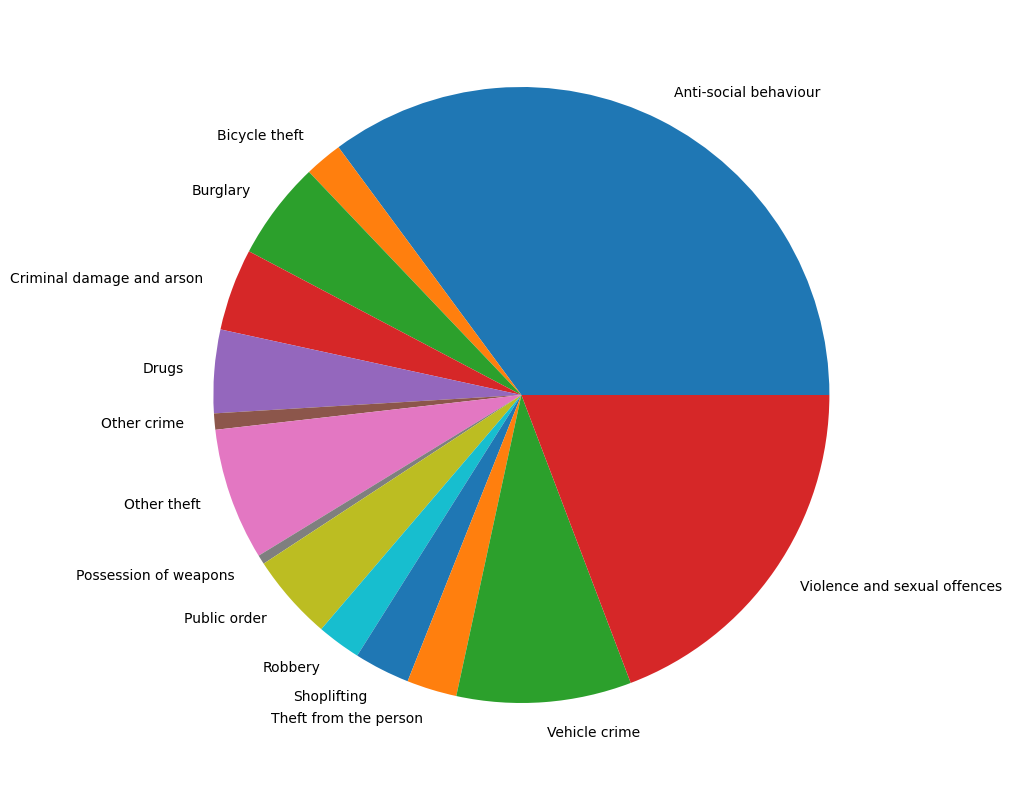

In [34]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,10)
type_counts1.plot(kind='pie', ax=ax)
plt.show()

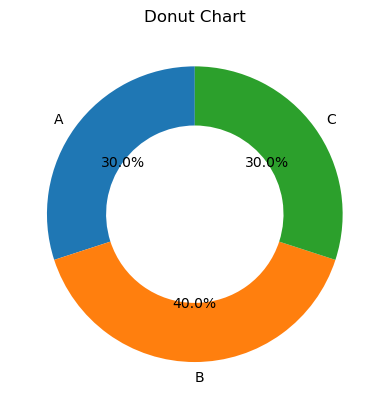

In [35]:
import matplotlib.pyplot as plt

sizes = [30, 40, 30]
labels = ['A', 'B', 'C']

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, wedgeprops={'width': 0.4})
ax.set(aspect="equal")
plt.title("Donut Chart")
plt.show()


In [36]:
my_list=[10,20,30]
def tricky_append(lst):
    lst.append(40)
    lst=[50,60]
    lst.append(70)
tricky_append(my_list)
print(my_list)

[10, 20, 30, 40]


In [37]:
monthly_counts = merged_df.groupby('Month').size()
monthly_counts


Month
2020-01     90979
2020-02     86984
2020-03     87409
2020-04    109951
2020-05    114008
2020-06    100198
2020-07    103657
2020-08    104782
2020-09     99633
2020-10     99471
2020-11     96914
2020-12     87936
dtype: int64

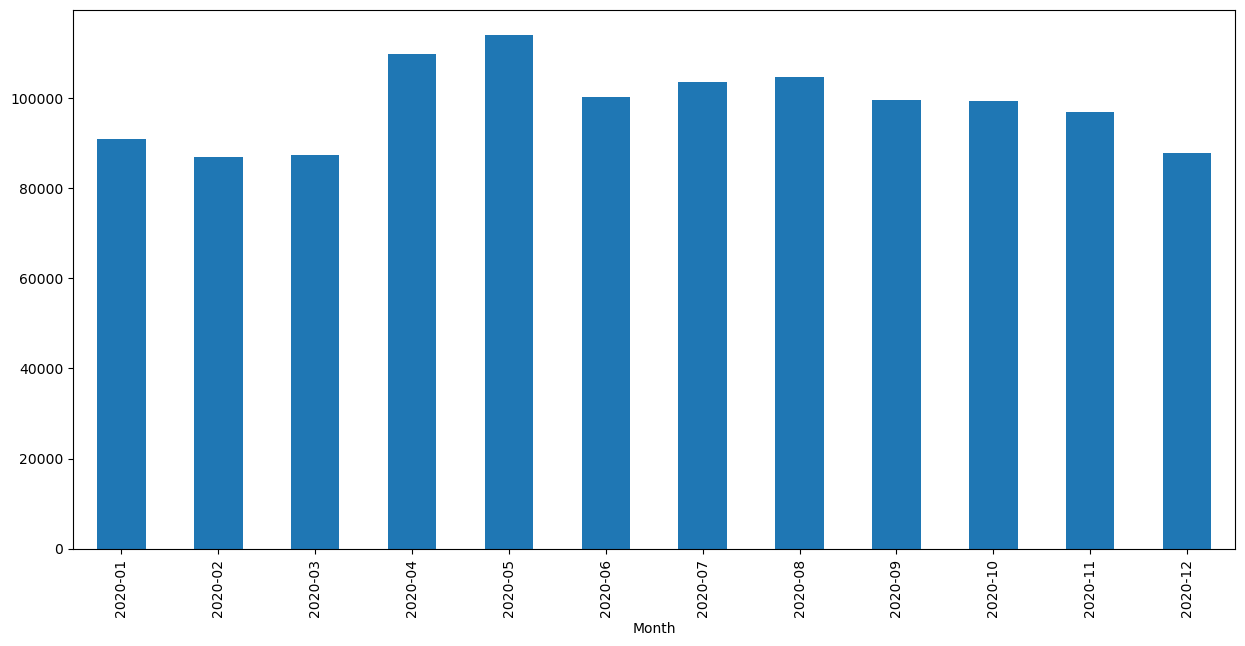

In [38]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,7)
monthly_counts.plot(kind='bar', ax=ax)
plt.show()

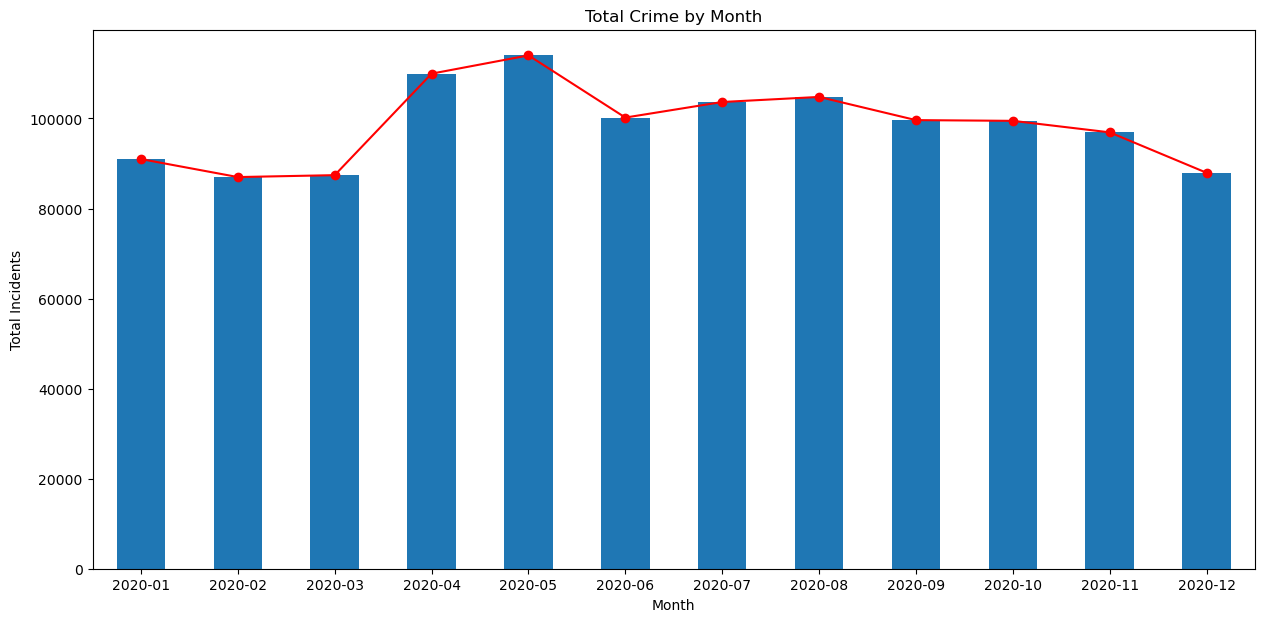

In [39]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,7)

monthly_counts.plot(kind='bar', ax=ax)
monthly_counts.plot(kind='line', ax=ax, color='red', marker='o')

ax.set_title('Total Crime by Month')
ax.set_ylabel('Total Incidents')

plt.show()

In [40]:
bicycle_thefts = merged_df[merged_df['Crime type'] == 'Bicycle theft']
bicycle_thefts

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
360,c094393925bb094348a2d13933aaa0d0b38c12a09c0e7c...,2020-01,Metropolitan Police Service,Metropolitan Police Service,0.153621,51.552200,On or near Sedgemoor Drive,E01000064,Barking and Dagenham 006E,Bicycle theft,Investigation complete; no suspect identified,NaN
619,6984333ffb944f2fd3b5045bccfe35ed2796799e57cbce...,2020-01,Metropolitan Police Service,Metropolitan Police Service,0.165546,51.545110,On or near Police Station,E01000036,Barking and Dagenham 010B,Bicycle theft,Status update unavailable,NaN
1075,f2d8f21dc493c1167f32e34b143a8291cb4a18342fe037...,2020-01,Metropolitan Police Service,Metropolitan Police Service,0.076951,51.536326,On or near East Street,E01000010,Barking and Dagenham 015C,Bicycle theft,Investigation complete; no suspect identified,NaN
1076,e0b29f9c97d5916a1e36a2873147bdd1cbfdfa0264a95e...,2020-01,Metropolitan Police Service,Metropolitan Police Service,0.080059,51.537440,On or near Police Station,E01000010,Barking and Dagenham 015C,Bicycle theft,Status update unavailable,NaN
1077,d3967d5b1463721962ca92c89462e165343cf06385acf5...,2020-01,Metropolitan Police Service,Metropolitan Police Service,0.077044,51.537106,On or near Parking Area,E01000010,Barking and Dagenham 015C,Bicycle theft,Status update unavailable,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
87552,afded920f8373a6acbba1bdfc2c193c8842fae831bc111...,2020-12,Metropolitan Police Service,Metropolitan Police Service,NaN,NaN,No Location,NaN,NaN,Bicycle theft,Investigation complete; no suspect identified,NaN
87553,780d16d9d7fc3bb50c788e163bc0fd5f24d66a6eca2d99...,2020-12,Metropolitan Police Service,Metropolitan Police Service,NaN,NaN,No Location,NaN,NaN,Bicycle theft,Investigation complete; no suspect identified,NaN
87554,156a673e7839c26a04a0722edea954c9fb8782f4d8ef4f...,2020-12,Metropolitan Police Service,Metropolitan Police Service,NaN,NaN,No Location,NaN,NaN,Bicycle theft,Investigation complete; no suspect identified,NaN
87555,7e9b8c2ad6d822f32ae53222669f732a24f0efde68c786...,2020-12,Metropolitan Police Service,Metropolitan Police Service,NaN,NaN,No Location,NaN,NaN,Bicycle theft,Investigation complete; no suspect identified,NaN


In [41]:
monthly_counts_bc = bicycle_thefts.groupby('Month').size()
monthly_counts_bc

Month
2020-01    1172
2020-02    1044
2020-03    1078
2020-04    1060
2020-05    1768
2020-06    2548
2020-07    2833
2020-08    3019
2020-09    3078
2020-10    2619
2020-11    1985
2020-12    1313
dtype: int64

In [42]:
result = monthly_counts_bc.reset_index()
result
result.rename(columns={0: 'values'}, inplace=True)

values2=result['values'].tolist()
values2
# result
monthsLis=result['Month'].tolist()
monthsLis


['2020-01',
 '2020-02',
 '2020-03',
 '2020-04',
 '2020-05',
 '2020-06',
 '2020-07',
 '2020-08',
 '2020-09',
 '2020-10',
 '2020-11',
 '2020-12']

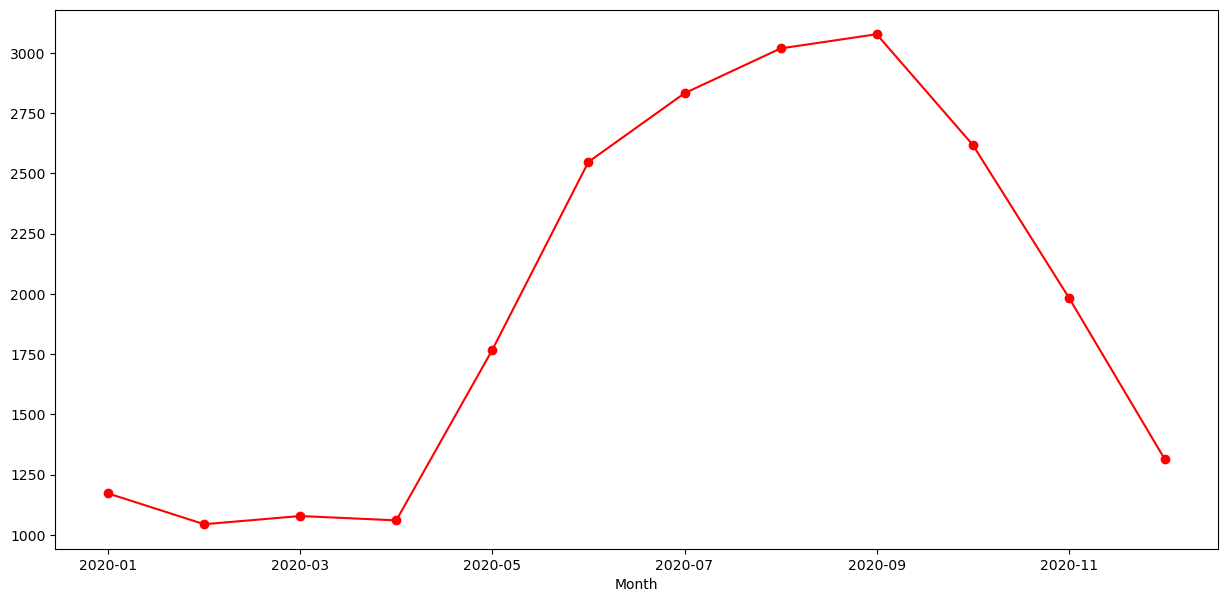

In [43]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,7)
monthly_counts_bc.plot(kind='line', ax=ax, color='red', marker='o')
plt.show()


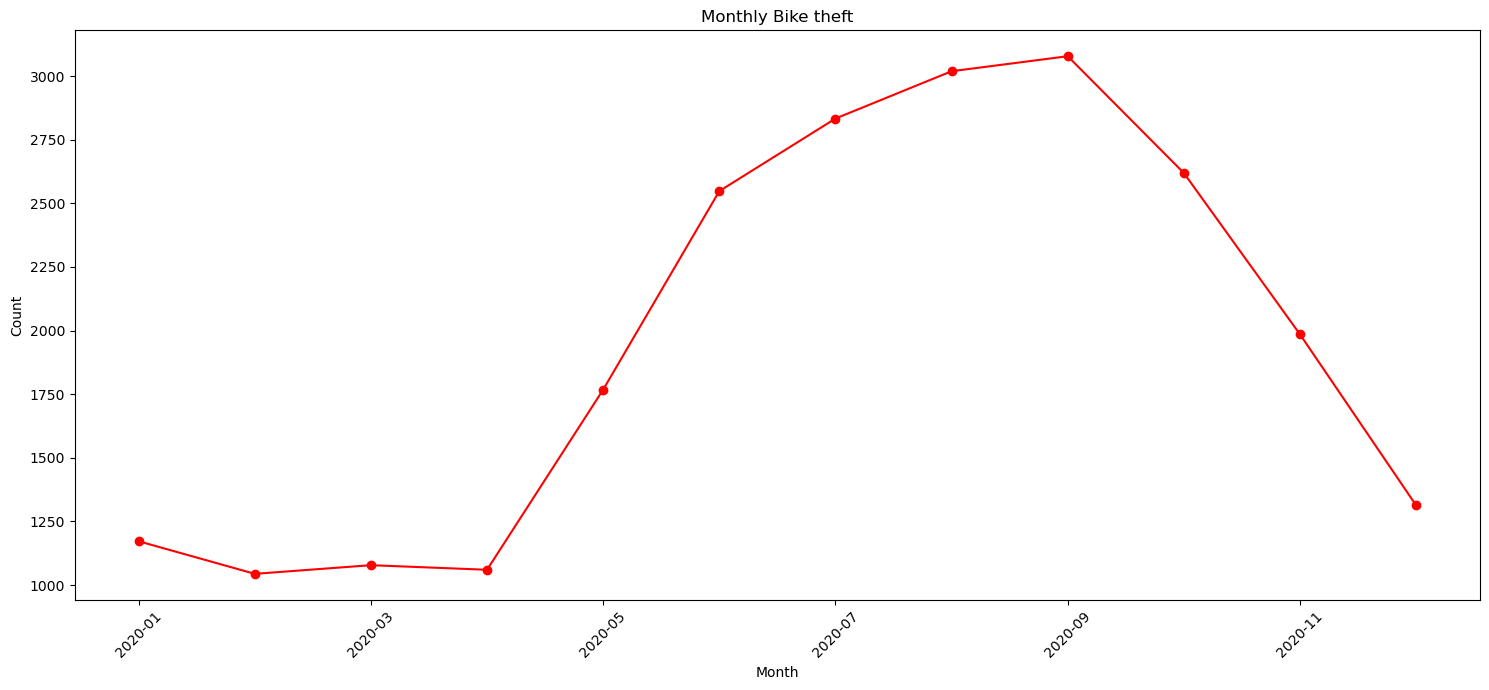

In [44]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,7)
monthly_counts_bc.plot(kind='line', ax=ax, color='red', marker='o')
# plt.show()
plt.title('Monthly Bike theft')
plt.xlabel('Month')
plt.ylabel('Count')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [45]:
label
# values

['Anti-social behaviour',
 'Bicycle theft',
 'Burglary',
 'Criminal damage and arson',
 'Drugs',
 'Other crime',
 'Other theft',
 'Possession of weapons',
 'Public order',
 'Robbery',
 'Shoplifting',
 'Theft from the person',
 'Vehicle crime',
 'Violence and sexual offences']

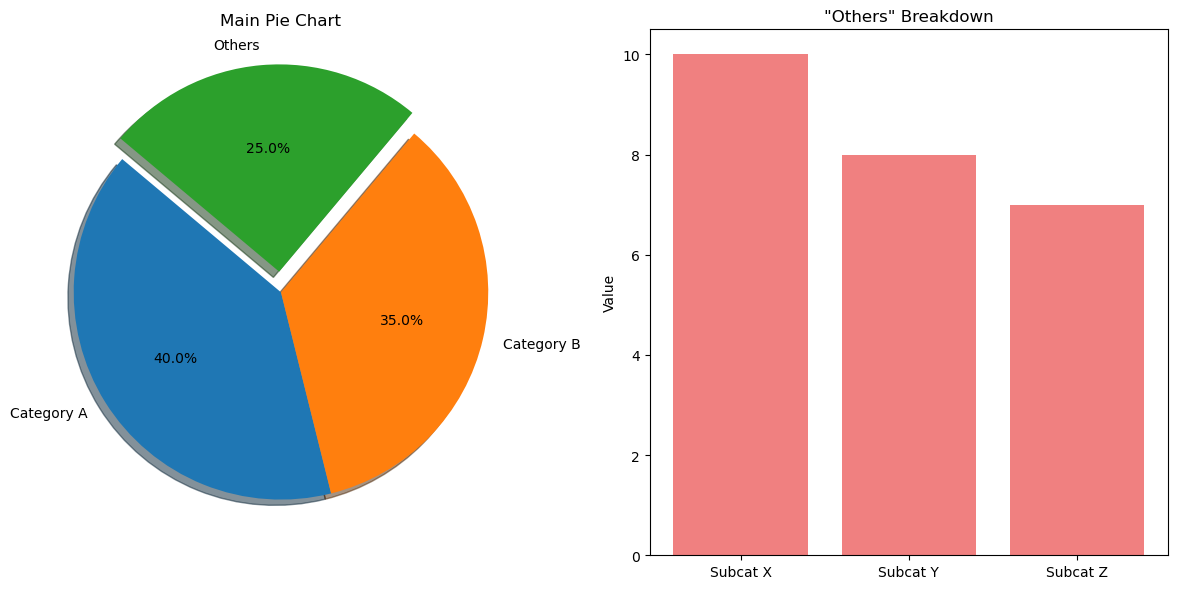

In [46]:
import matplotlib.pyplot as plt

# Full pie chart data
pie_labels = ['Category A', 'Category B', 'Others']

pie_sizes = [40, 35, 25]  # Aggregated data

# Details for the 'Others' slice
bar_labels = ['Subcat X', 'Subcat Y', 'Subcat Z']
bar_sizes = [10, 8, 7]  # These sum to 25, same as 'Others'

# Create a figure with two subplots: one pie and one bar
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart
explode = (0, 0, 0.1)  # "explode" the 'Others' slice
ax1.pie(pie_sizes, labels=pie_labels, explode=explode, autopct='%1.1f%%', shadow=True, startangle=140)
ax1.set_title('Main Pie Chart')

# Bar chart for 'Others'
ax2.bar(bar_labels, bar_sizes, color='lightcoral')
ax2.set_title('"Others" Breakdown')
ax2.set_ylabel('Value')

plt.tight_layout()
plt.show()


In [47]:
# values2
monthsLis

['2020-01',
 '2020-02',
 '2020-03',
 '2020-04',
 '2020-05',
 '2020-06',
 '2020-07',
 '2020-08',
 '2020-09',
 '2020-10',
 '2020-11',
 '2020-12']

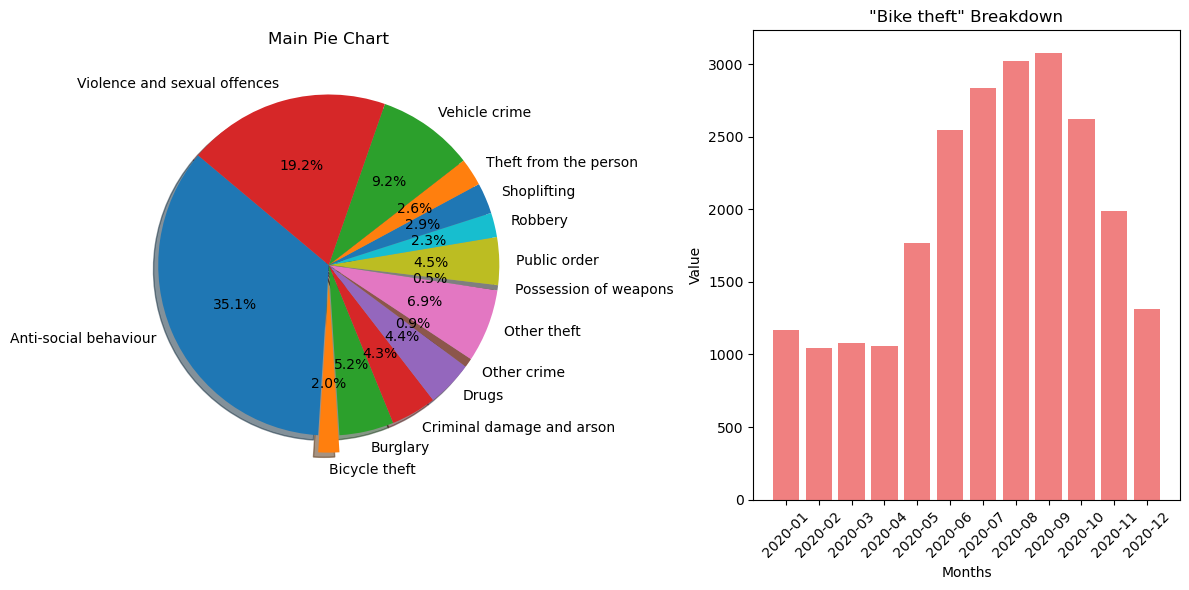

In [48]:
# Create a figure with two subplots: one pie and one bar
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
# label
# values
# Pie chart
explode = (0,0.1,0,0,0,0,0,0,0,0,0,0,0,0)  # "explode" the 'Others' slice
ax1.pie(values, labels=label, explode=explode, autopct='%1.1f%%', shadow=True, startangle=140)
ax1.set_title('Main Pie Chart')
# line diagram bike theft-------
# monthly_counts_bc.plot(kind='line', ax=ax2, color='red', marker='o')
# plt.show()
# ax2.title('Monthly Bike theft')
# ax2.xlabel('Month')
# ax2.ylabel('Count')
# ax2.xticks(rotation=45)
# bar of bike theft-----------
# bar_labels = ['Subcat X', 'Subcat Y', 'Subcat Z']
# bar_sizes = [10, 8, 7] 
# Bar chart for 'Others'
ax2.bar(monthsLis, values2, color='lightcoral')
ax2.set_title('"Bike theft" Breakdown')
ax2.set_ylabel('Value')
ax2.set_xlabel("Months")  # rotates the axis label itself
ax2.tick_params(axis='x', labelrotation=45) 
# ax2.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [49]:
# Bar types-----------------------

In [50]:
import matplotlib.pyplot as plt

plt.barh(categories, values)
plt.title("Horizontal Bar Chart")
plt.show()




NameError: name 'categories' is not defined

In [ ]:
import numpy as np

group1 = [10, 15, 7]
group2 = [12, 10, 9]
x = np.arange(len(categories))  # the label locations

width = 0.3

plt.bar(x - width/2, group1, width, label='Group 1')
plt.bar(x + width/2, group2, width, label='Group 2')

plt.xticks(x, categories)
plt.title("Grouped Bar Chart")
plt.legend()
plt.show()


In [ ]:
group1 = [10, 15, 7]
group2 = [5, 3, 6]

plt.bar(categories, group1, label='Group 1')
plt.bar(categories, group2, bottom=group1, label='Group 2')

plt.title("Stacked Bar Chart")
plt.legend()
plt.show()
